In [100]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
def CreateXpoly(X, n):
    Xpoly = X**0
    for i in range(1, n+1):
        Xpoly = np.hstack([Xpoly, X**i])
#         print(i, X**i, Xpoly)
    return Xpoly

In [102]:
a = np.array([
    [1],
    [2],
    [3]
])
b = np.array([
    [4],
    [5],
    [6]
])
c = CreateXpoly(a, 3)
c

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27]], dtype=int32)

In [103]:
def FindW(Xpoly, Y):
    front = inv(np.dot(Xpoly.T, Xpoly))
    back = np.dot(Xpoly.T, Y)
    W = np.dot(front, back)
    return W

In [104]:
def FindYhat(Xpoly, W):
    return np.dot(Xpoly, W)

In [105]:
def FindError(Y, Yhat):
    Error = ((Y - Yhat)**2).sum()
    return Error

In [129]:
Data = pd.read_csv('w1_ex1.csv')
DataMatrix = Data.values
X = DataMatrix[:, 1:2] # D:D+1
Y = DataMatrix[:, 2:3] # D:D+1

In [132]:
XTrain = X[:70]
YTrain = Y[:70]

XTest = X[70:]
YTest = Y[70:]

In [138]:
XpolyTrain = CreateXpoly(XTrain, 10)
W = FindW(XpolyTrain, YTrain)
YhatTrain = FindYhat(XpolyTrain, W)
ErrorTrain = FindError(YTrain, YhatTrain)
print(ErrorTrain)

3.0095143851976562


In [139]:
XpolyTest = CreateXpoly(XTest, 10)
YhatTest = FindYhat(XpolyTest, W)
ErrorTest = FindError(YTest, YhatTest)
print(ErrorTest)

0.17665830472136468


In [145]:
Unseen = pd.read_csv('w1_ex1.csv')
UnseenMatrix = Unseen.values
UnseenX = UnseenMatrix[:, 1:2]
UnseenY = UnseenMatrix[:, 2:3]

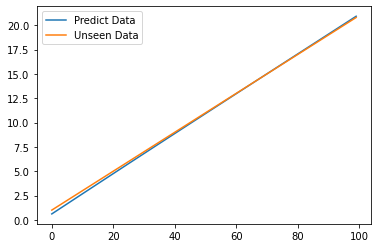

In [146]:
UnseenXpoly = CreateXpoly(UnseenX, 10)
UnseenYhat = FindYhat(UnseenXpoly, W)
ErrorUnseen = FindError(UnseenY, UnseenYhat)
plt.plot(UnseenYhat, label='Predict Data')
plt.plot(UnseenY, label='Unseen Data')
plt.legend()
# print(UnseenYhat)